In [56]:
# Read data from file

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv(r'C:\Users\ssc\Desktop\BlueCognito\blucognitiondatascientistshortlistedfortechnicalro\Data-Sample\train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [58]:
df.Loan_Amount_Term.nunique()

10

In [59]:
df=df.drop(['Loan_ID'],axis=1)

In [60]:
df.shape

(614, 12)

In [61]:
# you can determine the total number of missing values using
# the isnull method plus the sum method on the dataframe

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
df.dropna(inplace=True)
df.shape

(480, 12)

In [63]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [64]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [65]:
model_df = pd.concat([df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']],pd.get_dummies(df.Gender, drop_first=True),pd.get_dummies(df.Dependents, drop_first=True),pd.get_dummies(df.Married, drop_first=True),pd.get_dummies(df.Education, drop_first=True),pd.get_dummies(df.Self_Employed, drop_first=True),pd.get_dummies(df.Property_Area, drop_first=True),pd.get_dummies(df.Loan_Status, drop_first=True)],axis=1)

In [66]:
model_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,1,2,3+,Yes,Not Graduate,Yes,Semiurban,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,1,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,0,1,0,1,1


In [67]:
model_df.shape

(480, 15)

In [68]:
model_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,1,2,3+,Yes,Not Graduate,Yes,Semiurban,Urban,Y
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.820833,0.166667,0.177083,0.085417,0.647917,0.202083,0.137500,0.397917,0.312500,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.383892,0.373067,0.382137,0.279792,0.478118,0.401973,0.344734,0.489979,0.463996,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
model_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,1,2,3+,Yes,Not Graduate,Yes,Semiurban,Urban,Y
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,0.032644,0.071367,-0.017426,0.143633,0.036717,-0.131172,0.170785,0.000551,-0.044767,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.156171,-0.016015,0.028266,-0.019006,0.102950,-0.074499,-0.001509,-0.008322,0.009866,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,0.098975,0.087870,0.061174,0.115373,0.183442,-0.172780,0.120389,0.013365,-0.098826,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.088704,-0.101258,-0.005885,-0.066826,-0.107504,-0.102168,-0.034852,0.030346,-0.065097,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.022447,-0.005280,0.037047,-0.063797,0.029095,-0.056656,-0.023568,0.046480,-0.027062,0.529390
Male,0.032644,0.156171,0.098975,-0.088704,0.022447,1.000000,-0.009718,0.159802,0.123341,0.349424,0.059245,-0.002761,-0.108538,0.057137,0.064504
1,0.071367,-0.016015,0.087870,-0.101258,-0.005280,-0.009718,1.000000,-0.207456,-0.136670,0.154106,-0.016242,0.081164,0.001903,0.096484,-0.040350
2,-0.017426,0.028266,0.061174,-0.005885,0.037047,0.159802,-0.207456,1.000000,-0.141766,0.261974,0.011184,0.036647,-0.042625,0.064022,0.073368
3+,0.143633,-0.019006,0.115373,-0.066826,-0.063797,0.123341,-0.136670,-0.141766,1.000000,0.162856,0.031827,-0.013798,-0.004791,-0.077390,-0.005784
Yes,0.036717,0.102950,0.183442,-0.107504,0.029095,0.349424,0.154106,0.261974,0.162856,1.000000,0.001652,0.015674,0.011121,0.026467,0.112321


Loan Yes or NO


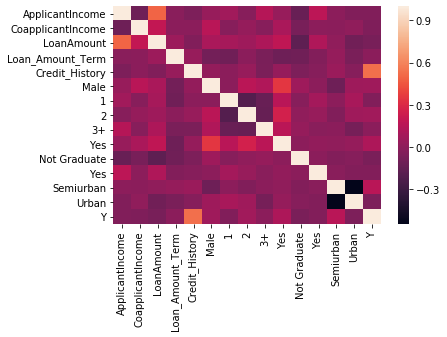

In [70]:
import seaborn as sns
corr = model_df.corr()
print('Loan Yes or NO')
sns.heatmap(corr)

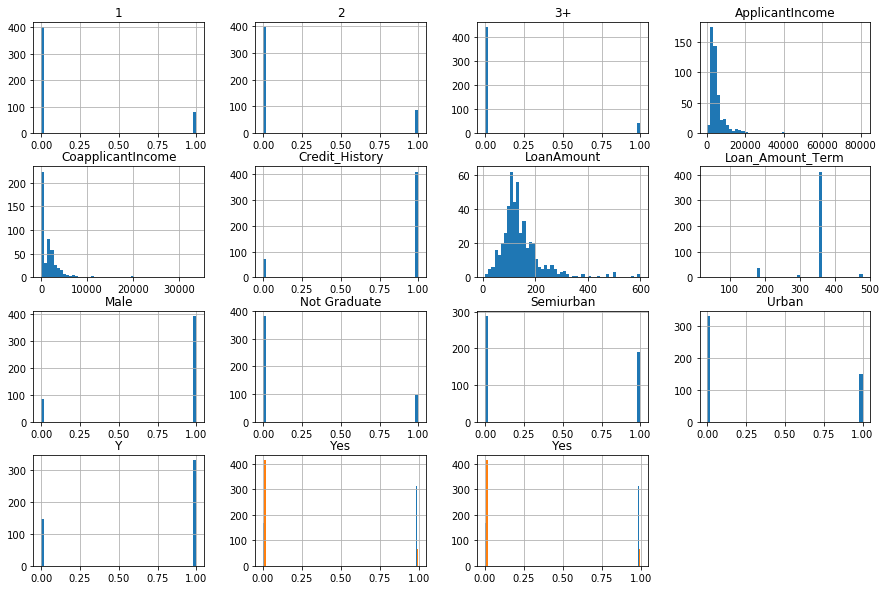

In [71]:
model_df.hist(bins=50, figsize=(15,10))
plt.show()

In [72]:
model_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Male', '1', '2', '3+', 'Yes',
       'Not Graduate', 'Yes', 'Semiurban', 'Urban', 'Y'],
      dtype='object')

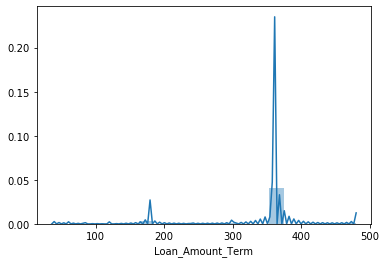

In [73]:
sns.distplot(model_df.Loan_Amount_Term)

In [74]:
model_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Male', '1', '2', '3+', 'Yes',
       'Not Graduate', 'Yes', 'Semiurban', 'Urban', 'Y'],
      dtype='object')

In [85]:
model_df.shape

(480, 15)

In [75]:
all_features = model_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Male', '1', '2','3+', 'Yes', 'Not Graduate', 'Yes', 'Semiurban', 'Urban']].values


all_classes = model_df['Y'].values

feature_names = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Male', '1', '2','3+', 'Yes', 'Not Graduate', 'Yes', 'Semiurban', 'Urban']

all_features

array([[4.583e+03, 1.508e+03, 1.280e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+03, 0.000e+00, 6.600e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [2.583e+03, 2.358e+03, 1.200e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [8.072e+03, 2.400e+02, 2.530e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [7.583e+03, 0.000e+00, 1.870e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.583e+03, 0.000e+00, 1.330e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [76]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[-0.13796959, -0.02795204, -0.20808917, ..., -0.3992747 ,
        -0.81295735, -0.67419986],
       [-0.4175358 , -0.604633  , -0.97900085, ...,  2.50454133,
        -0.81295735,  1.4832397 ],
       [-0.49118022,  0.29710022, -0.30756164, ..., -0.3992747 ,
        -0.81295735,  1.4832397 ],
       ...,
       [ 0.47820635, -0.51285354,  1.34616826, ..., -0.3992747 ,
        -0.81295735,  1.4832397 ],
       [ 0.39184635, -0.604633  ,  0.52552034, ..., -0.3992747 ,
        -0.81295735,  1.4832397 ],
       [-0.13796959, -0.604633  , -0.14591887, ...,  2.50454133,
         1.23007683, -0.67419986]])

In [77]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

In [78]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [79]:
 clf.score(testing_inputs, testing_classes)

0.675

In [82]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7166639528151686

In [83]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7601127152988856

In [113]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [114]:
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.808431936604429

In [115]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7750949848024316

In [116]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.6772452598060501
2 0.6394349761181068
3 0.7394105514546243
4 0.7209174627297728
5 0.758252822405558
6 0.7582953394123606
7 0.7770010131712259
8 0.7749620060790273
9 0.7730098422347662
10 0.7750949848024316
11 0.7709228904327688
12 0.7688395570994355
13 0.7583342379504993
14 0.7708378564191635
15 0.7644992039368939
16 0.7792598422347663
17 0.7686676798378926
18 0.7791286727456941
19 0.7707953394123608
20 0.7770453394123608
21 0.7645435301780287
22 0.7707953394123608
23 0.7604193805181648
24 0.7708803734259662
25 0.7499122521348965
26 0.7604618975249673
27 0.7416196265740338
28 0.7498679258937618
29 0.7374529599073673
30 0.7417064698219714
31 0.7312029599073673
32 0.7395806194818353
33 0.7312898031553046
34 0.7354564698219713
35 0.7250823201621073
36 0.7312898031553046
37 0.7270788102475032
38 0.7270788102475032
39 0.7229121435808366
40 0.7270806194818353
41 0.7145770010131713
42 0.7166603343465046
43 0.712493667679838
44 0.7207419669995658
45 0.7145344840063685
46 0.722869626574034


In [117]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(all_features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, all_classes, cv=10)

cv_scores.mean()

0.701945831524099

In [118]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8063486032710957

In [119]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7709228904327688

In [120]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7876375018092343

In [121]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8041766174554927

In [160]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(12, input_dim=16, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [161]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8020833253860473

# We are able to classify the model data upto 80%  

Another try to find out best possible solution 

In [1]:
# System is not that much strong if xgboost is installed kernel died immediately and if xgboost is not there 
# it will take some time to work


import pandas as pd
from tpot import TPOTClassifier
import sklearn as sk
import numpy as np

In [3]:
tpot=TPOTClassifier(generations=100,
    population_size=100,
    offspring_size=None,
    mutation_rate=0.9,
    crossover_rate=0.1,
    scoring=None,
    cv=5,
    subsample=1.0,
    n_jobs=1,
    max_time_mins=10,
    max_eval_time_mins=5,
    random_state=None,
    config_dict=None,
    template=None,
    warm_start=False,
    memory=None,
    use_dask=False,
    periodic_checkpoint_folder=None,
    early_stop=None,
    verbosity=2,
    disable_update_check=False,
)

In [22]:
tpot.fit(training_inputs, training_classes)
print(tpot.score(testing_inputs,testing_classes))

Generation 1 - Current best internal CV score: 0.8305555555555555
Generation 2 - Current best internal CV score: 0.8305555555555555
Generation 3 - Current best internal CV score: 0.8305555555555555
Generation 4 - Current best internal CV score: 0.8305555555555555
Generation 5 - Current best internal CV score: 0.8305555555555555

10.21 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(RFE(input_matrix, criterion=entropy, max_features=0.4, n_estimators=100, step=0.6500000000000001), C=15.0, dual=True, loss=squared_hinge, penalty=l2, tol=0.01)
0.75


In [23]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('rfe',
                 RFE(estimator=ExtraTreesClassifier(bootstrap=False,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=0.4,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
            

Run almost 600 pipelines to find out the best solution and get 83% accuracy we are successful to increase the accuracy by 3% so far.

In [26]:
tpot.export(r'C:\Users\ssc\Desktop\BlueCognito\Test_Solution.ipynb')

Read test file for prediction

In [41]:
dft=pd.read_csv(r'C:\Users\ssc\Desktop\BlueCognito\blucognitiondatascientistshortlistedfortechnicalro\Data-Sample\test.csv')

In [42]:
dft.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
dft=dft.drop(['Loan_ID'],axis=1)

In [44]:
dft.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [45]:
dft.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [46]:
dft.shape

(367, 11)

In [47]:
dft.dropna(inplace=True)
dft.shape

(289, 11)

In [50]:
model_dft = pd.concat([dft[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']],pd.get_dummies(dft.Gender, drop_first=True),pd.get_dummies(dft.Dependents, drop_first=True),pd.get_dummies(dft.Married, drop_first=True),pd.get_dummies(dft.Education, drop_first=True),pd.get_dummies(dft.Self_Employed, drop_first=True),pd.get_dummies(dft.Property_Area, drop_first=True)],axis=1)

In [51]:
model_dft.shape

(289, 14)

In [87]:
all_features_test = model_dft[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Male', '1', '2','3+', 'Yes', 'Not Graduate', 'Yes', 'Semiurban', 'Urban']].values

feature_names = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Male', '1', '2','3+', 'Yes', 'Not Graduate', 'Yes', 'Semiurban', 'Urban']

all_features_test

array([[5.720e+03, 0.000e+00, 1.100e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.076e+03, 1.500e+03, 1.260e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.000e+03, 1.800e+03, 2.080e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [4.158e+03, 7.090e+02, 1.150e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.000e+03, 2.393e+03, 1.580e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.200e+03, 0.000e+00, 9.800e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [88]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled_test = scaler.fit_transform(all_features_test)
all_features_scaled_test

array([[ 0.22638209, -0.64389065, -0.44956532, ..., -0.35286487,
        -0.6562721 ,  1.24800726],
       [-0.32647975, -0.01190781, -0.18109186, ..., -0.35286487,
        -0.6562721 ,  1.24800726],
       [ 0.0758297 ,  0.11448876,  1.19483466, ..., -0.35286487,
        -0.6562721 ,  1.24800726],
       ...,
       [-0.10023296, -0.34517343, -0.36566736, ..., -0.35286487,
        -0.6562721 ,  1.24800726],
       [ 0.0758297 ,  0.36433264,  0.35585508, ..., -0.35286487,
        -0.6562721 , -0.80127739],
       [ 0.95405197, -0.64389065, -0.65092042, ...,  2.83394601,
        -0.6562721 , -0.80127739]])

In [89]:
result=clf.predict(all_features_scaled_test)

In [91]:
print(result)

[1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]


In [92]:
model_dft['Loan_Status']=result

In [94]:
Loan_Status=[]
for value in model_dft["Loan_Status"]: 
    if value == 1: 
        Loan_Status.append("Yes")  
    else: 
        Loan_Status.append("No") 
       
model_dft["Loan_Status"] = Loan_Status    
print(model_dft)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1               3076               1500       126.0             360.0   
2               5000               1800       208.0             360.0   
4               3276                  0        78.0             360.0   
5               2165               3422       152.0             360.0   
..               ...                ...         ...               ...   
361             2269               2167        99.0             360.0   
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History  Male  1  2  3+  Yes  Not Graduate  Yes  Semiurban  Urban  \
0               1.0     1  0  0   0    1  

In [95]:
dft['Loan_Status']=Loan_Status

In [96]:
dft.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,No
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,No


In [97]:
dft.to_csv(r'C:\Users\ssc\Desktop\BlueCognito\blucognitiondatascientistshortlistedfortechnicalro\Data-Sample\test_predicted.csv')